### Predicting Bike Rentals with Machine Learning

##### Dmitrii Shurkhai final project

## 1. Introductory Narrative

The Bike Sharing Dataset contains hourly rental data from the Capital Bikeshare program (2011–2012). It includes weather, season, holiday, and working day information. This dataset is interesting because it allows us to predict bike rental demand and explore real-world patterns.  

**Data access link:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)  


- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
	- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


## 2. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [85]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

## 3. Inspect Data

In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
df_hour.shape

(17379, 17)

In [11]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [82]:
# All data is already perfect, we dont have any missing 

1:winter, 2:spring, 3:summer, 4:fall

## 4. Exploratory Data Analysis

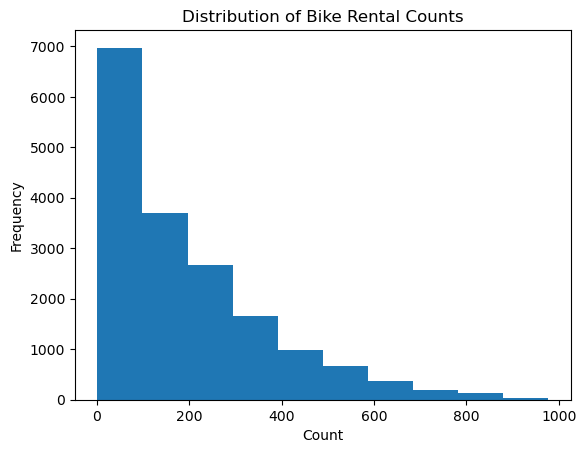

In [18]:
plt.hist(df_hour['cnt'])
plt.title('Distribution of Bike Rental Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

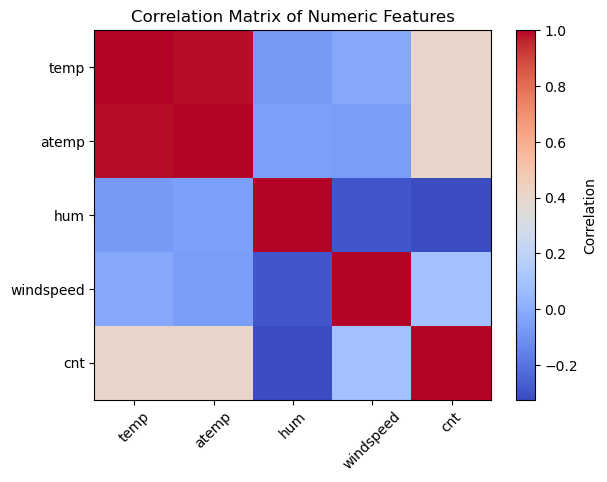

In [99]:
numeric_corr = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
corr_matrix = df_hour[numeric_corr].corr()

plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Do the same but with seaborn

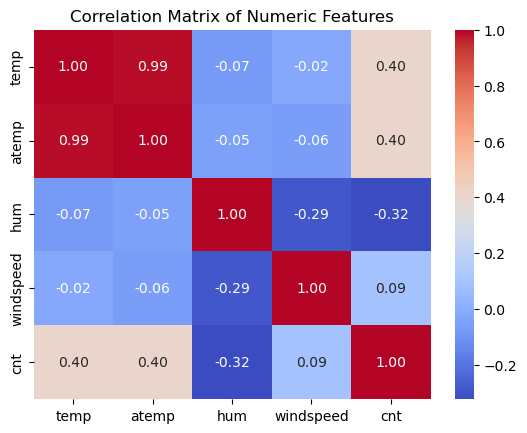

In [98]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

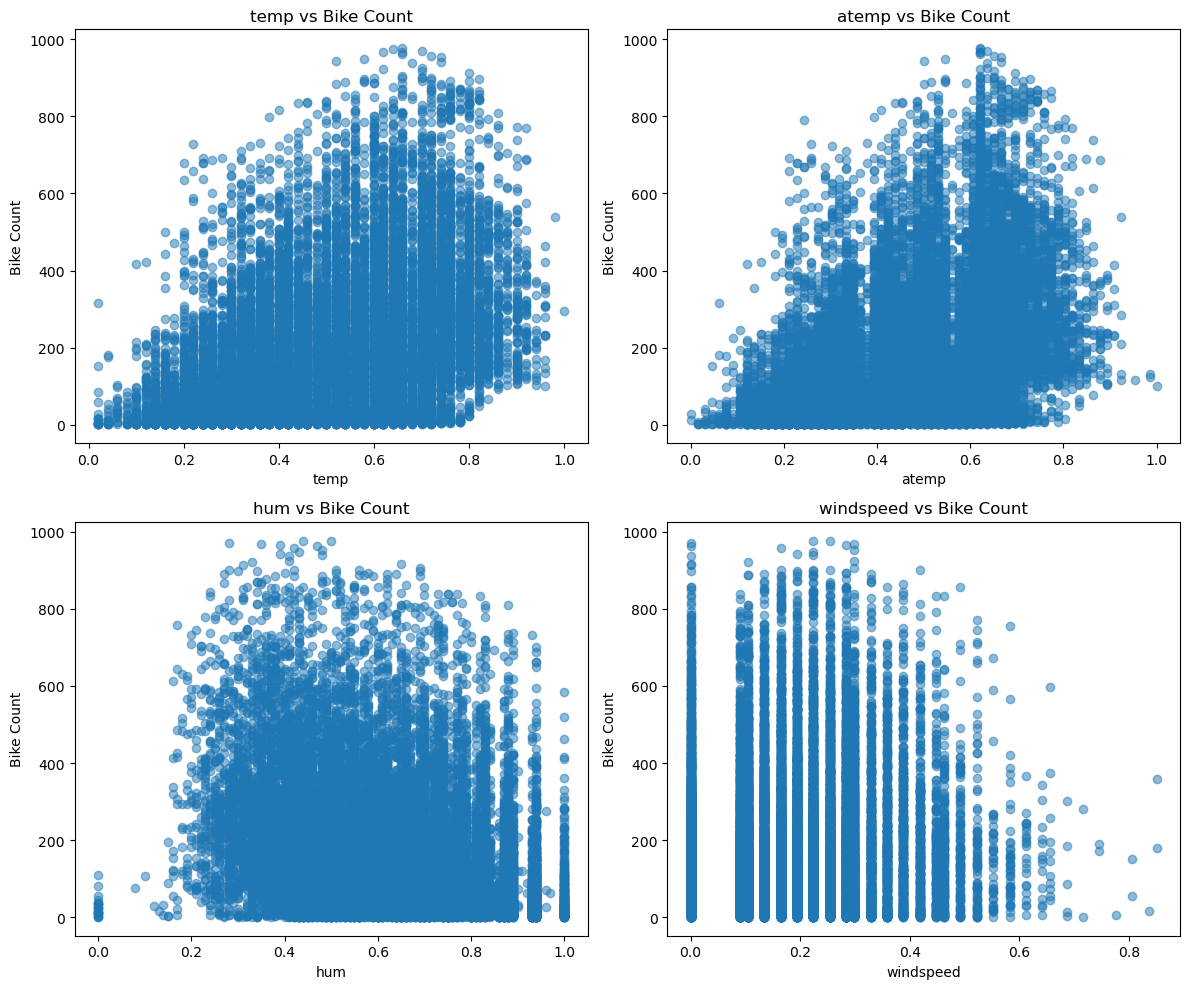

In [107]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid for 4 features

for i, feature in enumerate(numeric_features):
    ax = axes[i//2, i%2]
    ax.scatter(df_hour[feature], df_hour['cnt'], alpha=0.5)
    ax.set_title(f'{feature} vs Bike Count')
    ax.set_xlabel(feature)
    ax.set_ylabel('Bike Count')

plt.tight_layout()
plt.show()

### Do the same but using seaborn

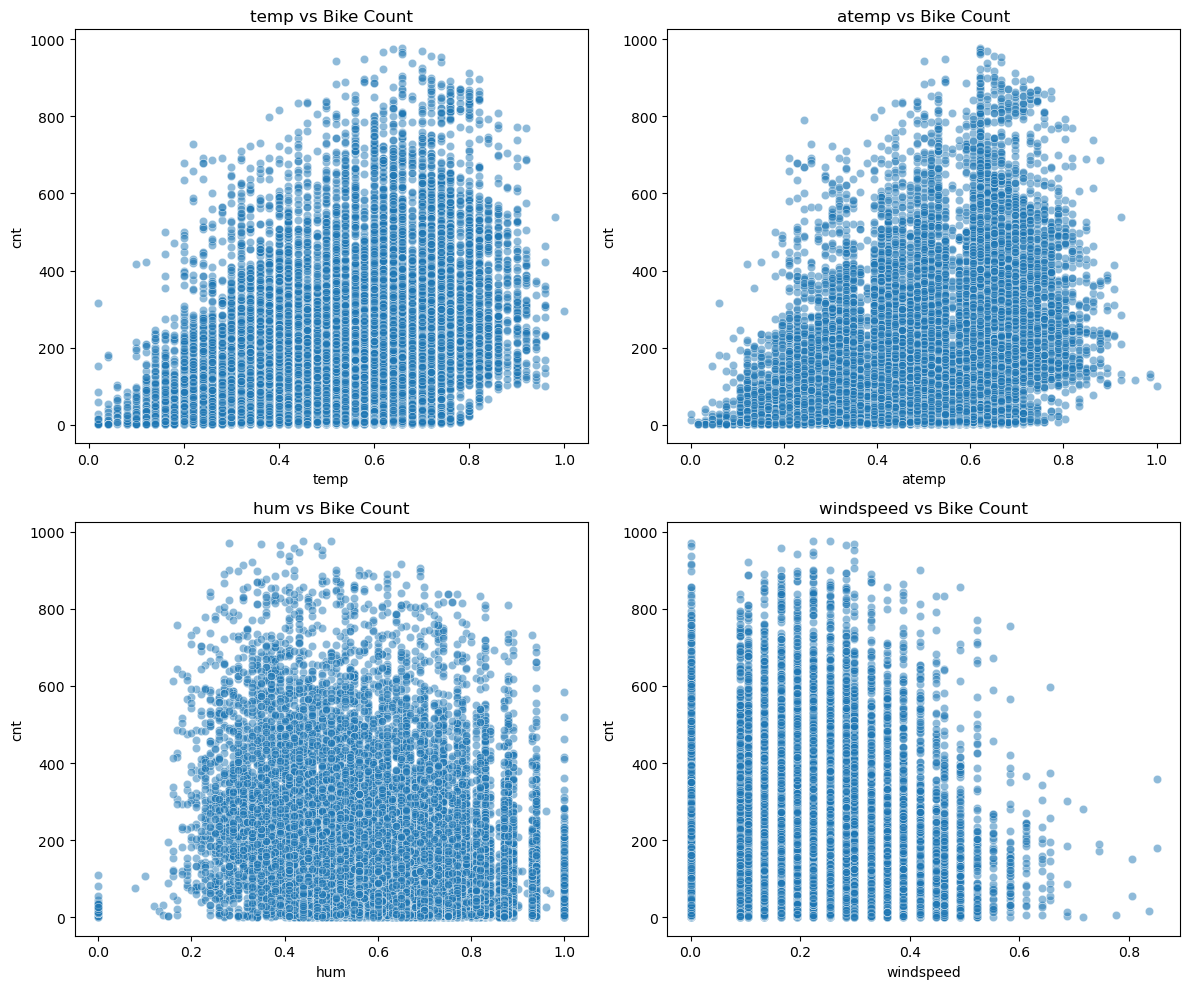

In [109]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid for 4 features

for i, feature in enumerate(numeric_features):
    ax = axes[i//2, i%2]
    sns.scatterplot(data=df_hour, x=feature, y='cnt', alpha=0.5, ax=ax)
    ax.set_title(f'{feature} vs Bike Count')

plt.tight_layout()
plt.show()


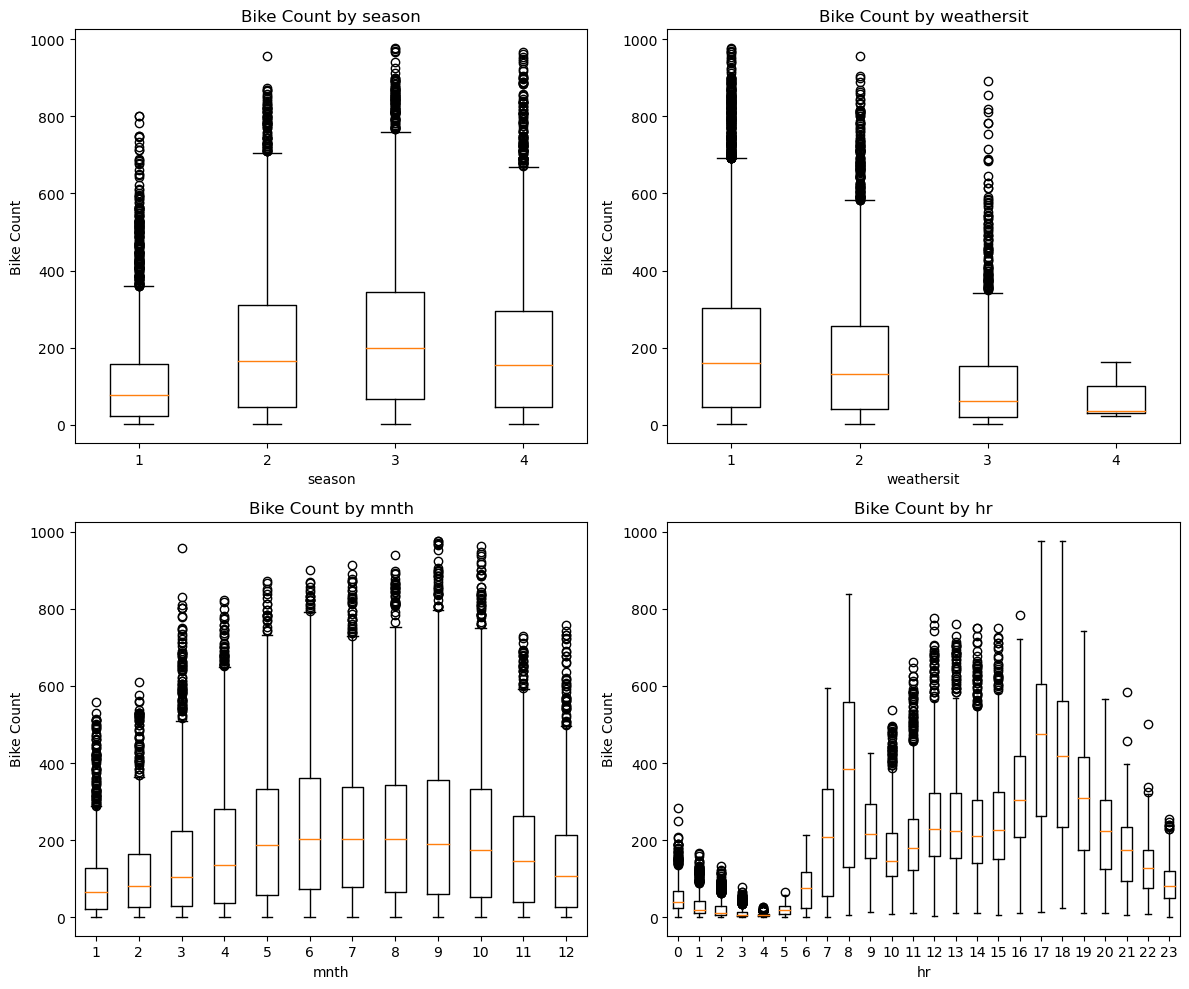

In [94]:
categorical_features = ['season', 'weathersit', 'mnth', 'hr']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid for 4 features

for i, feature in enumerate(categorical_features):
    ax = axes[i//2, i%2]
    data_to_plot = [df_hour['cnt'][df_hour[feature] == val] 
                    for val in sorted(df_hour[feature].unique())]
    ax.boxplot(data_to_plot, labels=sorted(df_hour[feature].unique()))
    ax.set_title(f'Bike Count by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Bike Count')

plt.tight_layout()
plt.show()

### Do the same but using seaborn

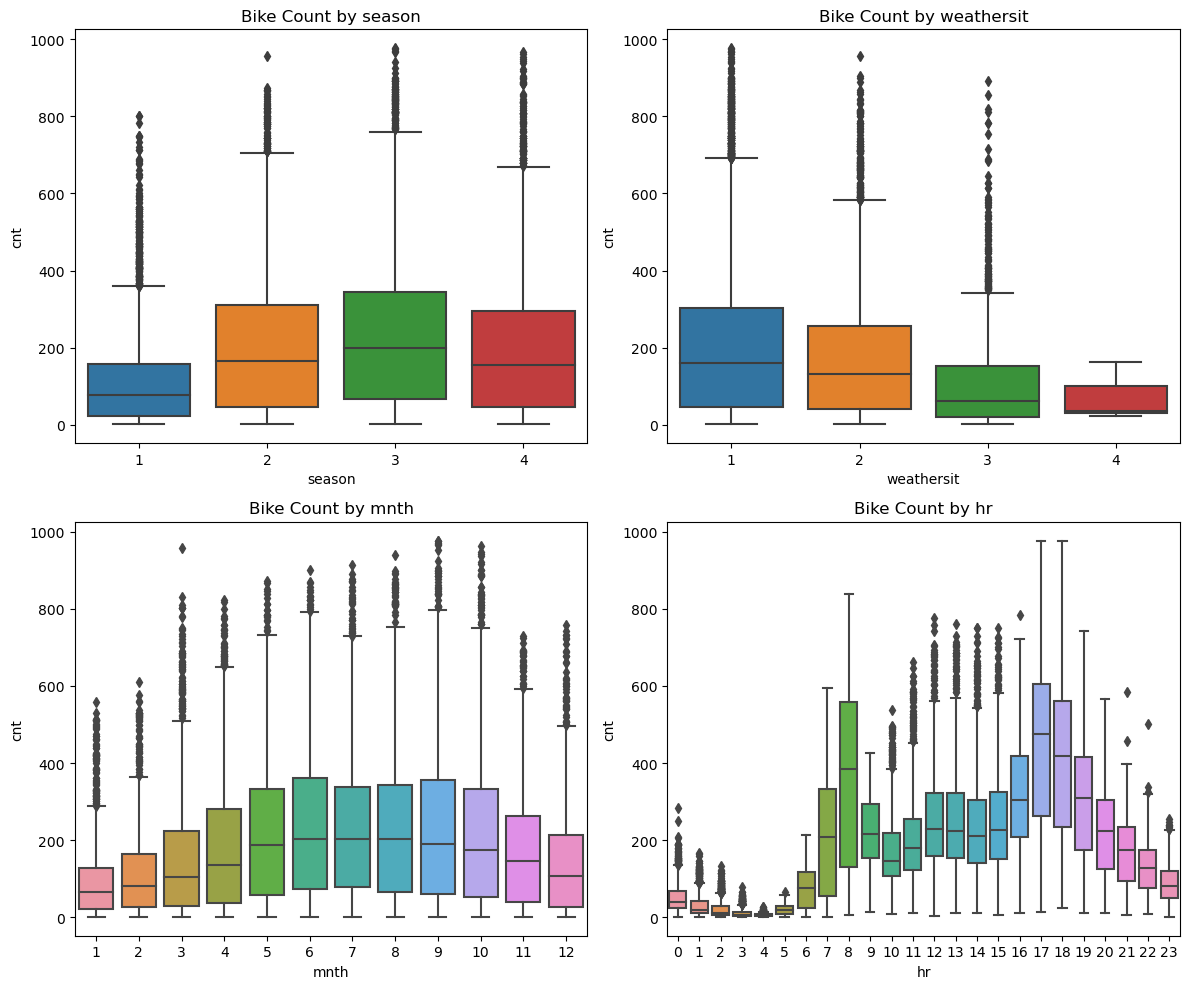

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, feature in enumerate(categorical_features):
    ax = axes[i//2, i%2]
    sns.boxplot(data=df_hour, x=feature, y='cnt', ax=ax)
    ax.set_title(f'Bike Count by {feature}')

plt.tight_layout()
plt.show()

# 1:winter, 2:spring, 3:summer, 4:fall

/Users/jimmy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


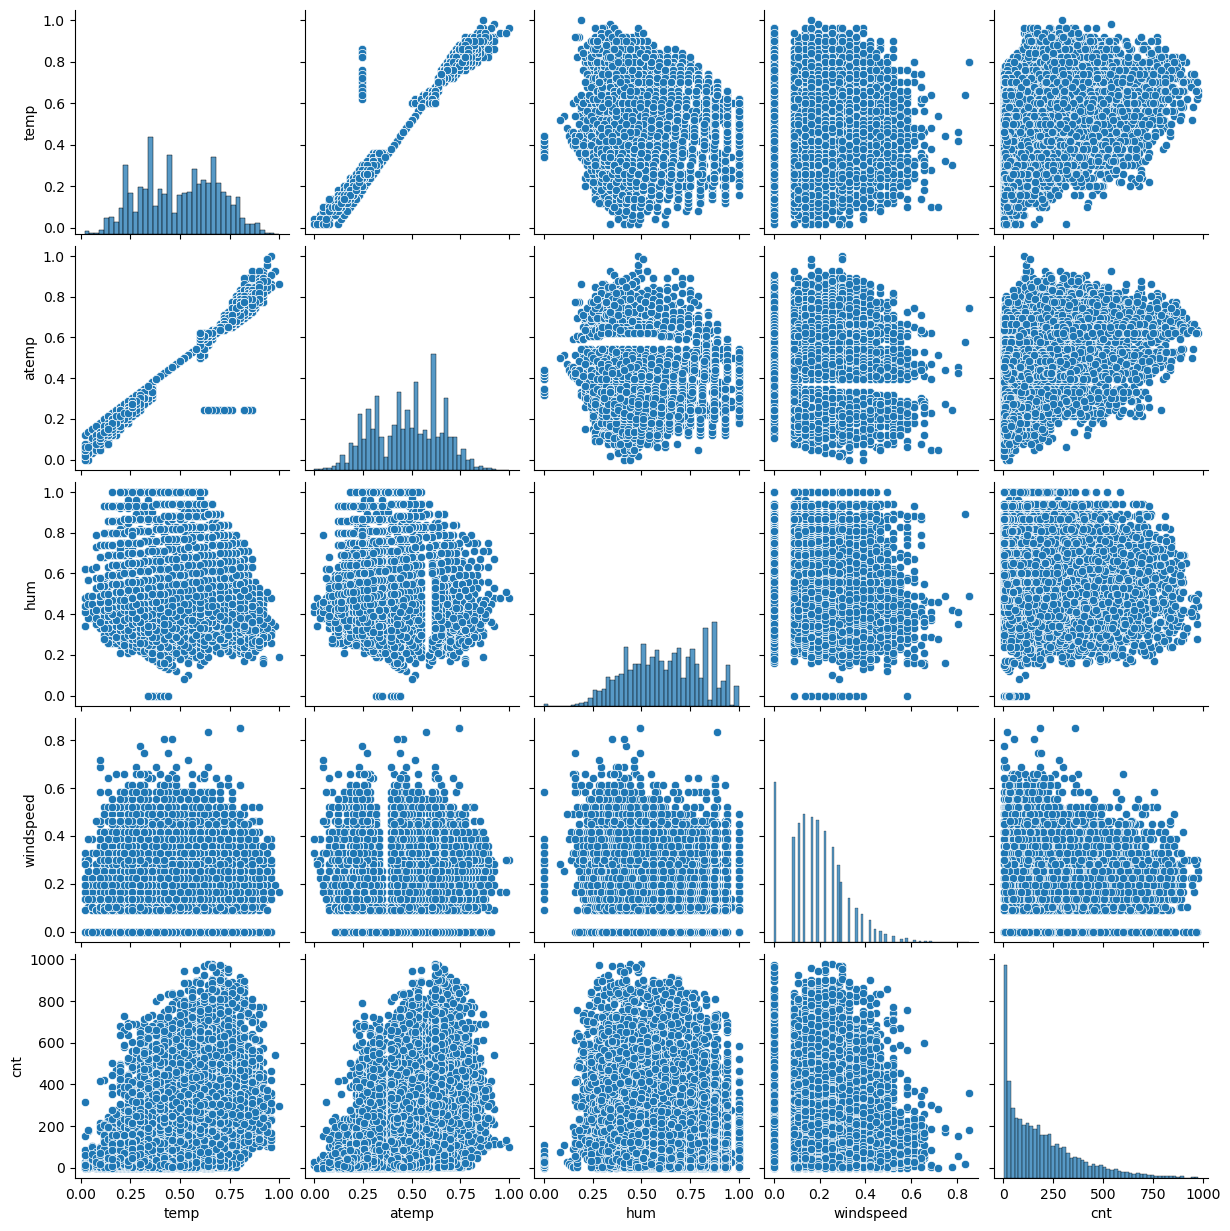

In [103]:
sns.pairplot(df_hour[numeric_cols])
plt.show()

## 5. Data Preprocessing

In [81]:
features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
            'temp', 'atemp', 'hum', 'windspeed']
x = df_hour[features]
y = df_hour['cnt']

In [34]:
x.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [37]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
scaler = StandardScaler()
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed']
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

/var/folders/dv/32mqpdxn2zzg0l1wz466h_4r0000gn/T/ipykernel_10906/3606224351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
x_train.shape

(13903, 11)

In [45]:
y_train.shape

(13903,)

## 6. Machine Learning Models
We will apply three machine learning models to predict hourly bike rentals (`cnt`):

1. **XGBoost Regressor**  
2. **TensorFlow Neural Network**  
3. **Random Forest Regressor** 
4. **Linear Regression**
5. **KNN**

In [77]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [105]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit model
xgb_model.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate
mse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Performance:")
print("MSE:", mse_xgb)
print("MAE:", mae_xgb)
print("R^2:", r2_xgb)

XGBoost Performance:
MSE: 63.06811836110001
MAE: 42.594991858799965
R^2: 0.8743869924395935


In [70]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model
rf_model.fit(x_train, y_train)

# Predict
y_pred_rf = rf_model.predict(x_test)

# Evaluate
mse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R^2:", r2_rf)

Random Forest Performance:
MSE: 65.21159865165798
MAE: 42.218032844265444
R^2: 0.8657035415229578


In [69]:
nn_model = Sequential([
    Dense(64, input_dim=x_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # regression output
])

# Compile
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history = nn_model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

# Predict
y_pred_nn = nn_model.predict(x_test).flatten()

# Evaluate
mse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Performance:")
print("MSE:", mse_nn)
print("MAE:", mae_nn)
print("R^2:", r2_nn)


109/109 [==============================] - 0s 174us/step
Neural Network Performance:
MSE: 115.37181043616422
MAE: 74.1787954541427
R^2: 0.5796468739380146


In [73]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred_lr = lr_model.predict(x_test)

mse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("MSE:", mse_lr)
print("MAE:", mae_lr)
print("R^2:", r2_lr)

Linear Regression Performance:
MSE: 143.95668985278948
MAE: 106.75474199169615
R^2: 0.3455468386885282


In [78]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

mse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Performance:")
print("MSE:", mse_knn)
print("MAE:", mae_knn)
print("R^2:", r2_knn)


KNN Performance:
MSE: 76.84646582342748
MAE: 50.572497123130034
R^2: 0.8135069446341825


## 7. Model Comparison
Now we compare all five models based on RMSE, MAE, and R² metrics.

In [110]:
results = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'Neural Network', 'Linear Regression', 'KNN'],
    'MSE': [mse_xgb, mse_rf, mse_nn, mse_lr, mse_knn],
    'MAE': [mae_xgb, mae_rf, mae_nn, mae_lr, mae_knn],
    'R^2': [r2_xgb, r2_rf, r2_nn, r2_lr, r2_knn]
})

results

,Model,MSE,MAE,R^2
0,XGBoost,63.068118,42.594992,0.874387
1,Random Forest,65.211599,42.218033,0.865704
2,Neural Network,115.371810,74.178795,0.579647
3,Linear Regression,143.956690,106.754742,0.345547
4,KNN,76.846466,50.572497,0.813507


## 8. The final comment about results 

### Data Collection Bias
The dataset is from Washington D.C. (2011–2012) only.
Seasonal, cultural, or city-specific patterns may not represent other cities or years.
Example: Winter demand in D.C. is not the same as winter demand in Los Angeles.
### Sampling Bias
Some hours, holidays, or extreme weather conditions may be underrepresented.
Our model may underperform during rare events (e.g., snowstorms).
### Feature Bias
Weather, hour, and season strongly influence predictions.
Ignoring other factors (special events, bike maintenance, local disruptions) may bias predictions.
### Model Bias
Linear Regression assumes linear relationships  - poor performance because bike rentals are non-linear.
KNN may overfit local patterns.
Neural Networks and tree-based models reduce bias but may overfit without proper validation.